# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [131]:
# Your work here.

# df.head() to check the format of the dataframe.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [29]:
# Importing relevant packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st

    1. Is the distribution of body temperatures normal?

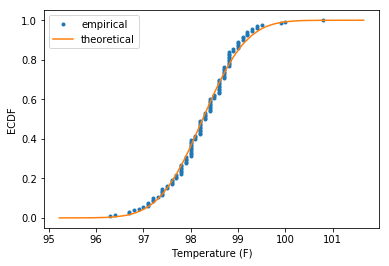

In [132]:
# A graphical method was used to determine if the body temperatures data is normal. The strategy is to obtain
# the mean and the standard deviation from the dataset and use it to model the theoretical normal ECDF curve and 
# then plot it above the ECDF of the original data.

# ECDF function
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1)/n
    return x, y

# Plotting the original data set
x_temp, y_temp = ecdf(df.temperature)
plt.plot(x_temp, y_temp, marker='.', linestyle='none')

# Calculating the mean and standard deviation of original data set for theoretical normal curve modelling
temp_mean = np.mean(df.temperature)
temp_std = np.std(df.temperature)

# Simulating normal distribution samples using mean and standard deviation from above
normal_samples = np.random.normal(temp_mean, temp_std, 100000)

# Plotting the theoretical curve
x_temp_norm, y_temp_norm = ecdf(normal_samples)
plt.plot(x_temp_norm, y_temp_norm)

# Labelling axes, creating legend, and showing graph
plt.xlabel("Temperature (F)")
plt.ylabel("ECDF")
plt.legend(['empirical', 'theoretical'], loc='upper left')
plt.show()

Using the empirical plots and the theoretical curve generated above, it can be concluded that the body temperature data is *fairly* normal. 

    2. Is there sample size large? Are the observations independent?

In [133]:
# Computing the sample size of the data set
print(len(df))

130


Since the size of the sample is 130 which is greater than 30, the sample size is considered large. The sampling distribution of the sample mean will tend towards a normal distribution.

The observations are independent from each other.

    3. Is the true population mean really 98.6 degrees F?
        - Would you use a one-sample or two-sample test? Why?

In this situation, I would use a one-sample test. This is because we only have one sample and we are trying to test this against an established body temperature of 98.6 degrees F. The null hypothesis is that the true population mean is 98.6 degrees F. The strategy is to find out the probability that a mean temperature of 98.2 degrees F would occur in a trial.

Null hypothesis: the true population mean is really 98.6 degrees F. Confidence level tested is to be 95% (with 5% Type I error).

p-value:  0.0


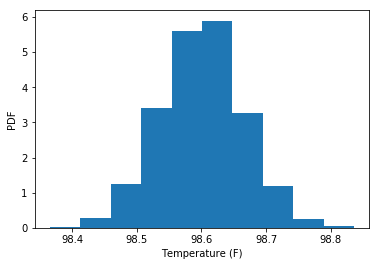

In [134]:
# The data set is shifted to the new mean of 98.6 degrees F
temp_shifted = df.temperature - temp_mean + 98.6

# Creating empty array
temp_bs_replicates = np.empty(10000)

# Creating bootstrap replicates for mean of bootstrap samples
for i in range(10000):
    temp_bs = np.random.choice(temp_shifted, len(temp_shifted))
    temp_bs_replicates[i] = np.mean(temp_bs)

# Finding the proportions of replicates with mean lower than or equal to mean of data set (98.2 degrees F)
p1 = np.sum(temp_bs_replicates <= temp_mean)/len(temp_bs_replicates)
print('p-value: ', p1)

# Visualizing the sampling distribution of the sample mean
plt.hist(temp_bs_replicates, normed=True)
plt.xlabel("Temperature (F)")
plt.ylabel("PDF")
plt.show()

p-value was found to be 0. Therefore, the null hypothesis is to be rejected.

    - In this situation, is it appropriate to use the t or z statistic?

In this situation, it is more appropriate to use z-statistic. This is because size of sample is 130 which is greater than 30; the sampling distribution of the sample mean will tend towards a normal distribution, and z-statistic models a normalized normal distribution.

In [71]:
# Using z-statistic to test hypothesis with a 95% confidence

# z_stat is to be calculated which is the normalized distance of the data set mean temperature from the sampling mean
z_stat = (temp_mean - np.mean(temp_bs_replicates))/np.std(temp_bs_replicates)

# z_critical is to be calculated which is the critical z-statistic at 97.5% (95% for two tails)
z_critical = st.norm.ppf(0.975)

print("z_stat = {:.2f}, z_critical = {:.2f}".format(z_stat, z_critical))
if z_critical < abs(z_stat):
    print("Null hypothesis is rejected with 95% confidence")

z_stat = -5.50, z_critical = 1.96
Null hypothesis is rejected with 95% confidence


    - Now try using the other test. How is the result different? Why?

In [135]:
# Using t-statistic to test hypothesis with a 95% confidence

# t_stat is to be calculated which is the normalized distance of the data set mean temperature from the sampling mean
t_stat = (temp_mean - np.mean(temp_bs_replicates))/np.std(temp_bs_replicates)

# t_critical is to be calculated which is the critical t-statistic at 97.5% (95% for two tails)
t_critical = st.t.ppf(0.975, 129)

print("t_stat = {:.2f}, t_critical = {:.2f}".format(t_stat, t_critical))
if t_critical < abs(t_stat):
    print("Null hypothesis is rejected with 95% confidence")

t_stat = -5.46, t_critical = 1.98
Null hypothesis is rejected with 95% confidence


Both z-statistic and t-statistic tests arrived at the same conclusion. This is becasue sample size (n=130) is quite large and therefore t-statistic approaches normal distribution. It can be seen that z_critical and t_critical for 95% confidence are still different. This is because t-distribution would have fatter/thicker tails compared to normal (z) distribution and therefore 95% confidence interval in t-distribution extends further.

    4. Draw a small sample of size 10 from the data and repeat both tests.
        - Which one is the correct one to use?
        - What do you notice? What does this tell you about the difference in application of the  t  and  z statistic?

In [136]:
# Steps repeated from above to generate bootstrap replicates with smaller sample size (n=10)

temp_shifted_small = np.random.choice(temp_shifted, 10)
temp_bs_replicates_small = np.empty(10000)

for i in range(10000):
    temp_bs_small = np.random.choice(temp_shifted_small, len(temp_shifted_small))
    temp_bs_replicates_small[i] = np.mean(temp_bs_small)

In [93]:
# Using z-statistic to test hypothesis with a 95% confidence and small sample size

z_stat_small = (temp_mean - np.mean(temp_bs_replicates_small))/np.std(temp_bs_replicates_small)
z_critical = st.norm.ppf(0.975)
print("z_stat = {:.2f}, z_critical = {:.2f}".format(z_stat_small, z_critical))
if z_critical < abs(z_stat_small):
    print("Null hypothesis is rejected with 95% confidence")

z_stat = -3.61, z_critical = 1.96
Null hypothesis is rejected with 95% confidence


In [94]:
# Using t-statistic to test hypothesis with a 95% confidence

t_stat_small = (temp_mean - np.mean(temp_bs_replicates_small))/np.std(temp_bs_replicates_small)
t_critical_small = st.t.ppf(0.975, 9)
print("t_stat = {:.2f}, t_critical = {:.2f}".format(t_stat_small, t_critical_small))
if t_critical_small < abs(t_stat_small):
    print("Null hypothesis is rejected with 95% confidence")

t_stat = -3.61, t_critical = 2.26
Null hypothesis is rejected with 95% confidence


Now that sample size has dropped to 10, which is below 30, t-statistic is the correct one to use. From the calculations above, it can be noticed that t_critical has increased from 1.98 to 2.26 as degrees of freedom dropped from 129 (130 - 1) to 9 (10 - 1); this indicates the existence of the thicker tails. However, despite the changes, both t-statistic and z-statistic seemed to have arrived at the same conclusion.

    5. At what temperature should we consider someone's temperature to be "abnormal"?
        - Start by computing the margin of error and confidence interval.

In [110]:
# Once again using sample size of 130, the margin of error and confidence interval are computed.

# Confidence interval
conf_interval = np.percentile(temp_bs_replicates, [2.5, 97.5])
print("confidence interval: ", conf_interval)

# Margin of error
margin_of_error = abs(conf_interval - np.mean(temp_bs_replicates))
print("margin of error: ", margin_of_error)

confidence interval:  [ 98.47461538  98.72538462]
margin of error:  [ 0.125378    0.12539123]


Therefore, we should consider someone's temperature to be abnormal if it's less than 98.5F or above 98.7F.

    6. Is there a significant difference between males and females in normal temperature?
        - What test did you use and why?
        - Write a story with your conclusion in the context of the original problem.

Null hypothesis: there is no difference between male and female temperatures and any differences observed occurred by chance.

In [137]:
# Use .groupby() method to work out the mean temperatures by gender
df.groupby('gender').mean()['temperature']

gender
F    98.393846
M    98.104615
Name: temperature, dtype: float64

In [138]:
# Separating the data set by gender
temp_male = df[df['gender'] == 'M'].temperature
temp_female = df[df['gender'] == 'F'].temperature

# Calculating the empirical difference and storing it in a variable
empirical_diff = np.mean(temp_female) - np.mean(temp_male)
print("Empirical difference in temperature between female and male: ", empirical_diff)

Empirical difference in temperature between female and male:  0.289230769230727


p-value:  0.0114


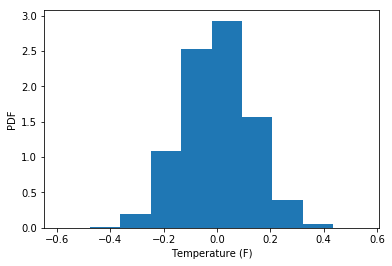

In [139]:
# Computing permutation replicates of difference between the means of female and male
temp_perm_replicates = np.empty(10000)
for i in range(10000):
    temp_perm = np.random.permutation(df.temperature)
    temp_perm_replicates[i] = np.mean(temp_perm[len(temp_male):]) - np.mean(temp_perm[:len(temp_male)])

# Working out the proportions of replicates with difference greater than the empirical_diff
p2 = np.sum(temp_perm_replicates > empirical_diff)/len(temp_perm_replicates)
print("p-value: ", p2)

# Visualizing the sampling distribution
plt.hist(temp_perm_replicates, normed=True)
plt.xlabel("Temperature (F)")
plt.ylabel("PDF")
plt.show()

p-value was found to be 0.0115, which is below 5%. Therefore, the null hypothesis was rejected; there is a significant difference between male and female temperatures. Female temperatures are generally higher than male temperatures.

In this case, two-sample test was done to test the difference of mean.

Based on the analyses done above, it can be concluded that with 95% confidence the mean body temperature is not 98.6F. Further analyses showed that there is a difference between male and female temperatures. Given that the body temperature of 98.6F was probably measured 120 years ago, it could be that the gender ratio has changed overtime. However, one should be open to causes outside the scope of this study, i.e. factors related to genetics, environmental, and degree of measurement accuracy 120 years ago.